# <center><font color='#26a7de'>Analyzing the Twitter/X Data</font><center>

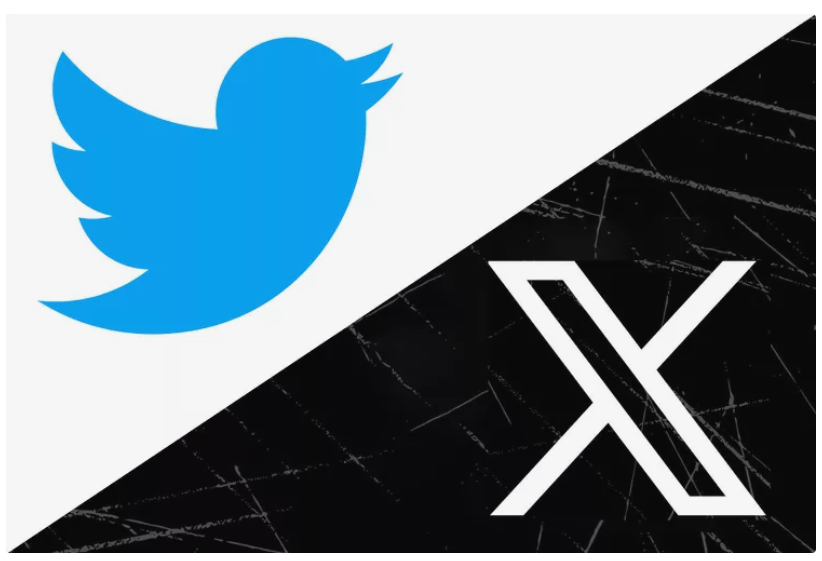

Here in this notebook, I have analyzed the Play House Communication Twitter data to derive valuable insights that can help to make data-driven business decisions. Grab a coke bottle and a snack as I take you on this adventrous ride. 

### Importing Packages

There are some packages that are really important in for data exploration and machine learning, this section shows the packages used for this project

In [191]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows',200)
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier, CatBoostRegressor
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import os

### Importing data

The Twitter data in csv format was read in with the pandas package

In [192]:
twitter = pd.read_csv(r'..\..\original_datasets\Post Performance (Stanbic IBTC) January 1, 2013 - July 13, 2023_Twitter.csv',low_memory = False, thousands = ',',float_precision = 'legacy')

In [193]:
#duplicating data
twitter_original = twitter.copy()

### Exploratory data analysis 1

I have splitted my exploration into two phases. This first phase shows the analysis and derivation of basic information from the data.


In [194]:
#deriving shape of file
twitter.shape

(8529, 147)

In [195]:
#deriving more information about file size, number of columns etc
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8529 entries, 0 to 8528
Columns: 147 entries, Date to Tags
dtypes: float64(134), int64(1), object(12)
memory usage: 9.6+ MB


In [196]:
#printing total number of columns
print('Total number of columns :',twitter.shape[1])

Total number of columns : 147


In [197]:
#printing total number of rows
print('Total number of rows :',twitter.shape[0])

Total number of rows : 8529


In [198]:
#identifying number of columns that are numeric
number_of_numeric_columns =  len(twitter.select_dtypes('number').columns.to_list())
number_of_numeric_columns

135

In [199]:
#identifying number of columns that are non-numeric
number_of_non_numeric_columns =  len(twitter.select_dtypes('object').columns.to_list())
number_of_non_numeric_columns

12

In [200]:
#identifying colummns percentage of null values present
null_values_percent = twitter.isna().sum()/twitter.shape[0] * 100
null_values_percent

Date                                             0.000000
Post ID                                          0.000000
Network                                          0.000000
Post Type                                        0.000000
Content Type                                     0.000000
Profile                                          0.000000
Sent by                                          0.000000
Link                                             0.562786
Post                                             0.000000
Linked Content                                  41.634424
Impressions                                      8.054872
Organic Impressions                              8.054872
Viral Impressions                              100.000000
Non-viral Impressions                          100.000000
Paid Impressions                               100.000000
Fan Impressions                                100.000000
Fan Organic Impressions                        100.000000
Fan Paid Impre

In [201]:
(twitter.isna().sum()/twitter.shape[0] * 100)[(twitter.isna().sum()/twitter.shape[0] * 100) > 50]

Viral Impressions                              100.000000
Non-viral Impressions                          100.000000
Paid Impressions                               100.000000
Fan Impressions                                100.000000
Fan Organic Impressions                        100.000000
Fan Paid Impressions                           100.000000
Non-fan Impressions                            100.000000
Non-fan Organic Impressions                    100.000000
Non-fan Paid Impressions                       100.000000
Reach                                          100.000000
Organic Reach                                  100.000000
Viral Reach                                    100.000000
Non-viral Reach                                100.000000
Paid Reach                                     100.000000
Fan Reach                                      100.000000
Fan Paid Reach                                 100.000000
Engagement Rate (per Reach)                    100.000000
Dislikes      

In [202]:
#identifying duplicated values
twitter.duplicated().any()

False

In [203]:
#taking a statistical overview of columns
twitter.describe()

,Post ID,Impressions,Organic Impressions,Viral Impressions,Non-viral Impressions,Paid Impressions,Fan Impressions,Fan Organic Impressions,Fan Paid Impressions,Non-fan Impressions,Non-fan Organic Impressions,Non-fan Paid Impressions,Reach,Organic Reach,Viral Reach,Non-viral Reach,Paid Reach,Fan Reach,Fan Paid Reach,Potential Reach,Engagement Rate (per Reach),Engagements,Reactions,Likes,Dislikes,Love Reactions,Haha Reactions,Wow Reactions,Sad Reactions,Angry Reactions,Comments,Shares,Saves,Post Link Clicks,Other Post Clicks,Post Clicks (All),Post Media Clicks,Post Hashtag Clicks,Post Detail Expand Clicks,Profile Clicks,Post Photo View Clicks,Post Video Play Clicks,Other Engagements,Answers,App Engagements,App Install Attempts,App Opens,Follows from Post,Unfollows from Post,Negative Feedback,bit.ly Link Clicks,Engaged Users,Engaged Fans,Users Talking About This,Unique Reactions,Unique Comments,Unique Shares,Unique Answers,Unique Post Clicks,Unique Post Link Clicks,Unique Post Photo View Clicks,Unique Post Video Play Clicks,Unique Other Post Clicks,Unique Negative Feedback,Subscribers Gained from Video,Annotation Clicks,Card Clicks,Video Views,Media Views,Organic Video Views,Paid Video Views,Partial Video Views,Organic Partial Video Views,Paid Partial Video Views,Full Video Views,Full Video View Rate,Follow Video Views,For You Video Views,Hashtag Video Views,Business Account Video Views,Sound Video Views,Unspecified Video Views,Organic Full Video Views,Paid Full Video Views,Autoplay Video Views,Click to Play Video Views,Sound on Video Views,Sound off Video Views,10-Second Video Views,Organic 10-Second Video Views,Paid 10-Second Video Views,Autoplay 10-Second Video Views,Click to Play 10-Second Video Views,Sound on 10-Second Video Views,Sound off 10-Second Video Views,Autoplay Partial Video Views,Click to Play Partial Video Views,Autoplay Full Video Views,Click to Play Full Video Views,95% Video Views,Organic 95% Video Views,Paid 95% Video Views,Video Length (Seconds),Average Video Time Watched (Seconds),Video View Time (Seconds),Organic Video View Time (Seconds),Paid Video View Time (Seconds),Unique Video Views,Unique Organic Video Views,Unique Paid Video Views,Unique 10-Second Video Views,Unique Full Video Views,Unique Organic 95% Video Views,Unique Paid 95% Video Views,Video Ad Break Ad Impressions,Video Ad Break Ad Earnings,Video Ad Break Ad Cost per Impression (CPM),YouTube Premium Views,Estimated Minutes Watched,Estimated Premium Minutes Watched,Story Taps Back,Story Taps Forward,Story Exits,Story Replies,Video Added to Playlists,Subscribers Lost from Video,Video Removed from Playlists,Annotation Impressions,Annotation Clickable Impressions,Annotation Closable Impressions,Annotation Closes,Card Impressions,Card Teaser Impressions,Card Teaser Clicks,Poll Votes
count,8.529000e+03,7842.000000,7842.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.449000e+03,0.0,7842.000000,7842.000000,7842.000000,0.0,0.0,0.0,0.0,0.0,0.0,7842.000000,7842.000000,0.0,3613.000000,7842.000000,7842.000000,6693.000000,5897.000000,7842.000000,7842.000000,0.0,0.0,7842.000000,0.0,7842.000000,7842.0,7842.000000,7842.000000,7842.000000,0.0,63.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,855.000000,6698.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,1.209537e+18,3188.676486,3188.676486,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.806459e+05,NaN,110.073706,20.210150,20.210150,NaN,NaN,NaN,NaN,NaN,NaN,6.244963,8.317394,NaN,7.002768,69.002168,72.228513,45.097116,1.534000,24.242158,5.116934,NaN,NaN,3.062357,NaN,0.000510,0.0,0.000510,0.028819,0.024356,NaN,975.174603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,176.845614,63.247387,NaN,NaN,NaN,NaN,NaN,N

In [204]:
#checking unique values in columns like Network, post type, content type, profile, tags

In [205]:
twitter['Network'].unique()

array(['Twitter'], dtype=object)

In [206]:
twitter['Post Type'].unique()

array(['Tweet'], dtype=object)

In [207]:
twitter['Content Type'].unique()

array(['Photo', 'Text', 'Video', 'Link'], dtype=object)

In [208]:
twitter['Profile'].unique()

array(["'@StanbicIBTC"], dtype=object)

In [209]:
twitter['Tags'].unique()

array(['CIB Posts', nan, 'Weekly Wealth Posts',
       'Insurance Limited Posts, Weekly Wealth Posts',
       'Enterprise Campaign', 'BCC', 'Pension, Weekly Wealth Posts',
       'CHNW Mass Retail', 'Asset Management, Weekly Wealth Posts',
       'Fuze Festival, Weekly Wealth Posts', 'CSI Posts',
       'Chemistry of Wealth, Weekly Wealth Posts',
       'Trustees Posts, Weekly Wealth Posts', 'CIB Posts, PMI', 'LATTES',
       'BCC, Enterprise Campaign', 'LATTES, Weekly Wealth Posts',
       'CIB Brand Campaign, CIB Posts', 'BCC, Blue Blossom',
       'CHNW Mass Retail, Reward4Saving',
       'Insurance Brokers Posts, Weekly Wealth Posts', 'Together4ALimb',
       'BCC, Trade Export Webinar',
       'CHNW Mass Retail, Weekly Wealth Posts',
       'CHNW Mass Retail, Cybersecurity Webinar, Weekly Wealth Posts',
       'BCC, Enterprise Academy Monday', 'Fuze Festival',
       'Fuze Festival, Pension', 'BCC, Trade Club',
       'Asset Management, Chemistry of Wealth, Weekly Wealth Posts',
 

### Exploratory Data Analysis 2

In this phase 2 of the exploratory data analysis, i performed more exploration and cleaned the data. In this section, I used the groupby method in pandas and also made a lot of visualizations 

#### Data Cleaning and Analysis

In [210]:
twitter['Engagement Rate (per Impression)'].head()

0     3.6%
1    1.76%
2    4.24%
3     3.4%
4    1.52%
Name: Engagement Rate (per Impression), dtype: object

The column above has % sign in its values which is not good for python. Usually the % sign has to be removed. A number of columns in this dataset have the % sign and they need to be removed. The below code identifies and removes them

In [211]:
# Identify columns with 'rate' in the column name
rate_columns = [col for col in twitter.columns if r'Rate' in col]

# Remove percent signs and convert to numeric
for col in rate_columns:
    twitter[col] = twitter[col].astype(str).str.rstrip('%')
    twitter[col] = twitter[col].str.replace(',','').astype(float)


Next was to identify columns that have zero missing values and they are shown belowm

In [212]:
null_values_percent[null_values_percent == 0]

Date            0.0
Post ID         0.0
Network         0.0
Post Type       0.0
Content Type    0.0
Profile         0.0
Sent by         0.0
Post            0.0
dtype: float64

Also, columns that contain exactly 100% null values were also identified and removed from the entire dataset since they had no meaningful information

In [213]:
totally_null_columns = null_values_percent[null_values_percent == 100].index.to_list()
totally_null_columns

['Viral Impressions',
 'Non-viral Impressions',
 'Paid Impressions',
 'Fan Impressions',
 'Fan Organic Impressions',
 'Fan Paid Impressions',
 'Non-fan Impressions',
 'Non-fan Organic Impressions',
 'Non-fan Paid Impressions',
 'Reach',
 'Organic Reach',
 'Viral Reach',
 'Non-viral Reach',
 'Paid Reach',
 'Fan Reach',
 'Fan Paid Reach',
 'Engagement Rate (per Reach)',
 'Dislikes',
 'Love Reactions',
 'Haha Reactions',
 'Wow Reactions',
 'Sad Reactions',
 'Angry Reactions',
 'Saves',
 'Post Photo View Clicks',
 'Post Video Play Clicks',
 'Answers',
 'Negative Feedback',
 'Engaged Users',
 'Engaged Fans',
 'Users Talking About This',
 'Unique Reactions',
 'Unique Comments',
 'Unique Shares',
 'Unique Answers',
 'Unique Post Clicks',
 'Unique Post Link Clicks',
 'Unique Post Photo View Clicks',
 'Unique Post Video Play Clicks',
 'Unique Other Post Clicks',
 'Unique Negative Feedback',
 'Subscribers Gained from Video',
 'Annotation Clicks',
 'Card Clicks',
 'Organic Video Views',
 'Paid Vi

In [214]:
twitter = twitter.drop(totally_null_columns, axis =1)
twitter.shape[1]

37

In [215]:
#checking sum of null values in 10 random columns
twitter.isna().sum().sample(10)

Link                           48
Date                            0
Linked Content               3551
Organic Impressions           687
Post Detail Expand Clicks     687
Post Clicks (All)             687
Content Type                    0
Click-Through Rate           4916
Potential Reach                80
Reactions                     687
dtype: int64

As part of the data cleaning process, it is important to ensure that the date column is in the datetime format so more features and be engineered in the feature engineering section and also to derive more insights in the exploratory phase section

In [216]:
twitter['Date'] = pd.to_datetime(twitter['Date'])

In [217]:
twitter['Date'].dtype #it simply means datetime

dtype('<M8[ns]')

In [218]:
#sorting the entire dataset by the date in ascending order
twitter = twitter.sort_values(by = ['Date'], ascending = True)

After removing the completely empty columns, it was discovered that some other columns also had a high percentage of null values. As is the usual practice in data science, when there are more than 50% null values, the best thing is to drop it. So, I have identified them and also dropped them in the next cells

In [219]:
(twitter.isna().sum()/twitter.shape[0] * 100)[(twitter.isna().sum()/twitter.shape[0] * 100) > 50]

Click-Through Rate    57.638645
Post Link Clicks      57.638645
bit.ly Link Clicks    99.261344
Video Views           89.975378
Tags                  83.585414
dtype: float64

In [220]:
columns_with_more_than_50percent_null_values = (twitter.isna().sum()/twitter.shape[0] * 100)[(twitter.isna().sum()/twitter.shape[0] * 100) > 50].index.to_list()

In [221]:
twitter = twitter.drop(columns_with_more_than_50percent_null_values, axis =1)
twitter.shape[1]

32

Yaay! Now we are left with 32 clean/good columns and we can go further in the analysis. The columns are shown below

In [222]:
twitter.columns

Index(['Date', 'Post ID', 'Network', 'Post Type', 'Content Type', 'Profile',
       'Sent by', 'Link', 'Post', 'Linked Content', 'Impressions',
       'Organic Impressions', 'Potential Reach',
       'Engagement Rate (per Impression)', 'Engagements', 'Reactions', 'Likes',
       'Comments', 'Shares', 'Other Post Clicks', 'Post Clicks (All)',
       'Post Media Clicks', 'Post Hashtag Clicks', 'Post Detail Expand Clicks',
       'Profile Clicks', 'Other Engagements', 'App Engagements',
       'App Install Attempts', 'App Opens', 'Follows from Post',
       'Unfollows from Post', 'Media Views'],
      dtype='object')

### More Exploration

As seen in the visualization below, the number of Twitter posts has increased from 2013 till 2023. There is a low count for 2023 because it is assumed that this data does not contain all the full data for year 2023

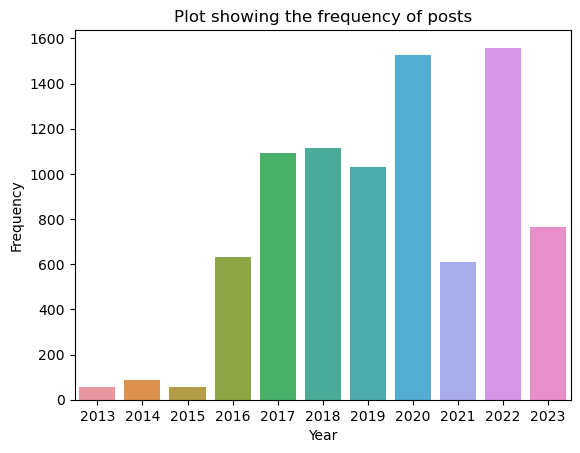

In [224]:
sns.countplot(x = twitter.Date.dt.year)
plt.title('Plot showing the frequency of posts')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.savefig('twitter year.jpg');

The plot below also shows the frequency of counts per month. It seems there are less posts in january ,july and august. We can't conclude yet though until we dig deeper

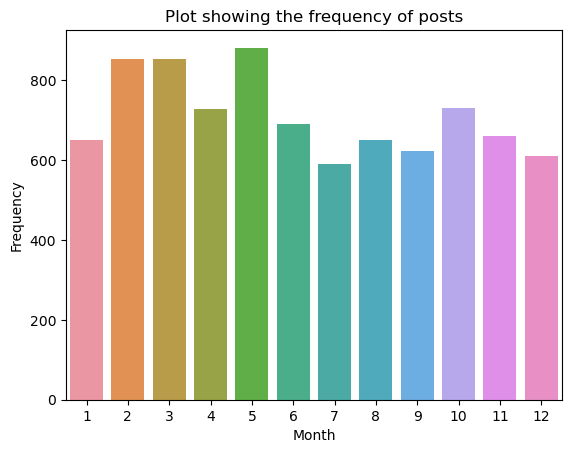

In [129]:
sns.countplot(x = twitter.Date.dt.month)
plt.title('Plot showing the frequency of posts')
plt.xlabel('Month')
plt.ylabel('Frequency');

Taking a hourly level approach, we can see that there is a significant trend between 7am and 10pm with the peak around 10am. I would say that there is likely to be more Twitter posts during the work hours of the day

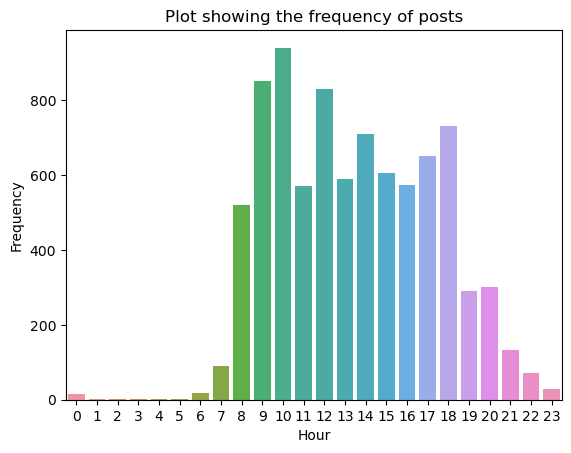

In [225]:
sns.countplot(x = twitter.Date.dt.hour)
plt.title('Plot showing the frequency of posts')
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.savefig('twitter hour.jpg');

The plot below also has a pattern, there is a rise and fall in the frequency of posts in each month. More analysis could be done here

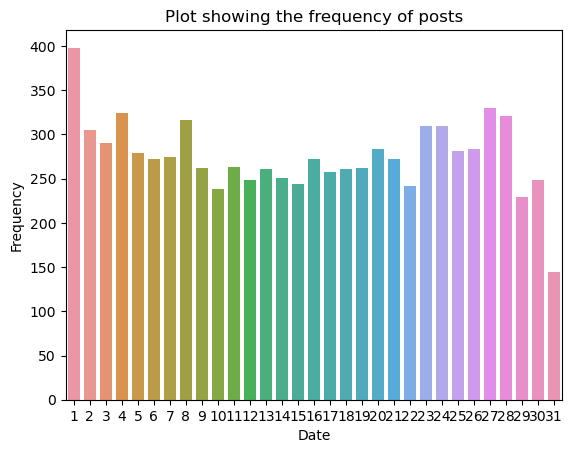

In [131]:
sns.countplot(x = twitter.Date.dt.day)
plt.title('Plot showing the frequency of posts')
plt.xlabel('Date')
plt.ylabel('Frequency');

In pandas Monday is 0 while saturday is 6
The plot below shows that number of posts increases from monday to wednesday, keeps reducing and significantly reduces on saturday and sunday since they are weekends an workers are probably enjoying the weekend.

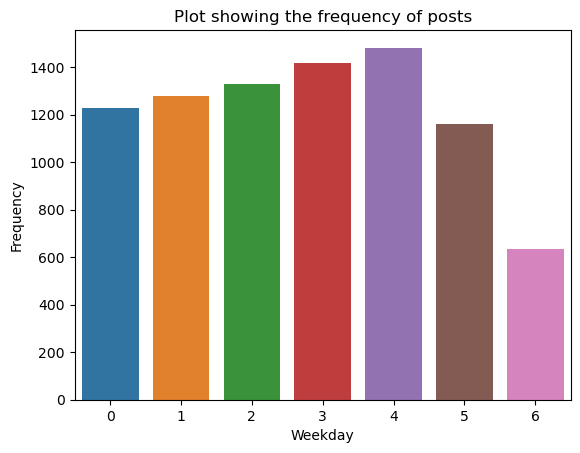

In [132]:
sns.countplot(x = twitter.Date.dt.weekday)
plt.title('Plot showing the frequency of posts')
plt.xlabel('Weekday')
plt.ylabel('Frequency');


The visusalization below shows that in the entire dataset, the Photo content type seems to be prevalent than other forms of contents

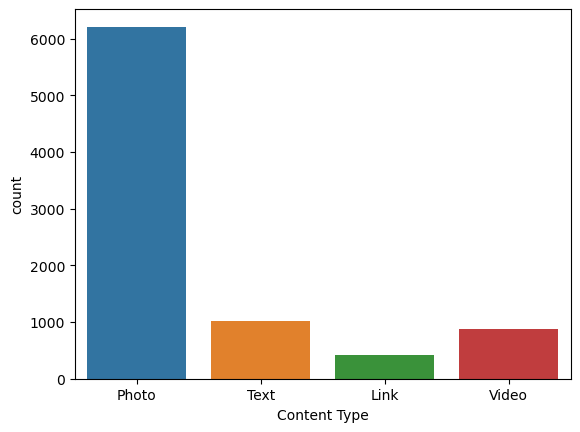

In [226]:
sns.countplot(x = 'Content Type', data = twitter)
plt.savefig('content_types.jpg');

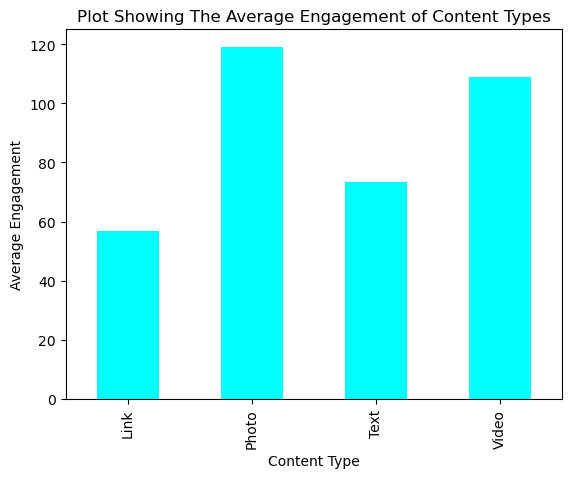

In [227]:
twitter.groupby('Content Type')['Engagements'].mean().plot(kind = 'bar', color = 'cyan')
plt.title('Plot Showing The Average Engagement of Content Types')
plt.xlabel('Content Type')
plt.ylabel('Average Engagement')
plt.savefig('content_types_engagement.jpg');

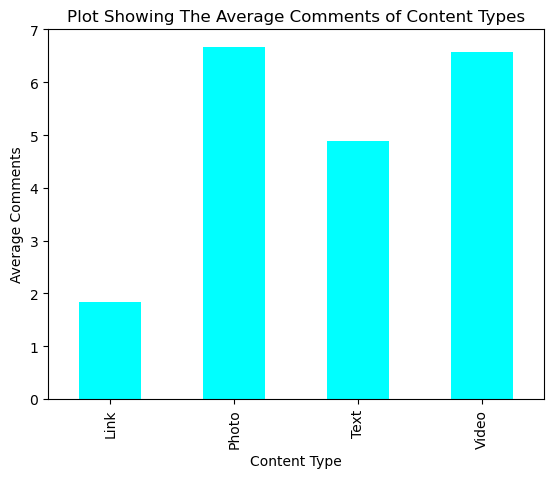

In [228]:
twitter.groupby('Content Type')['Comments'].mean().plot(kind = 'bar', color = 'cyan')
plt.title('Plot Showing The Average Comments of Content Types')
plt.xlabel('Content Type')
plt.ylabel('Average Comments')
plt.savefig('content_types_comment.jpg');

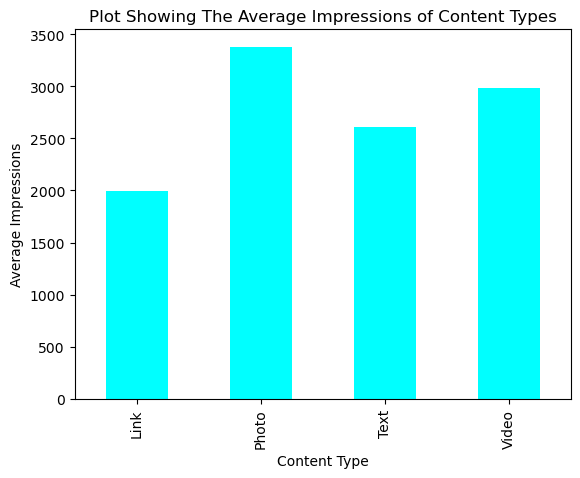

In [231]:
twitter.groupby('Content Type')['Impressions'].mean().plot(kind = 'bar', color = 'cyan')
plt.title('Plot Showing The Average Impressions of Content Types')
plt.xlabel('Content Type')
plt.ylabel('Average Impressions')
plt.savefig('content_types_Impressions.jpg');

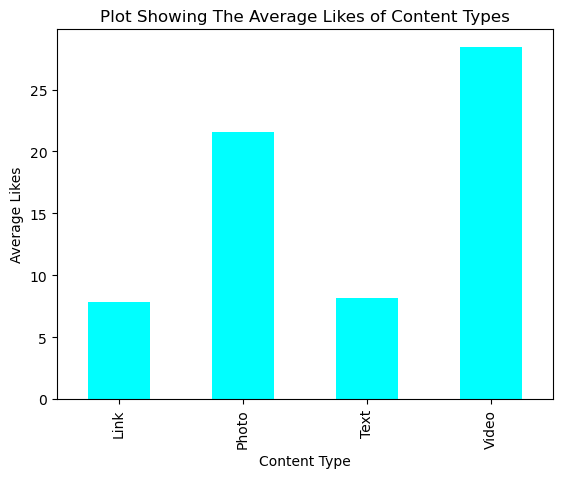

In [232]:
twitter.groupby('Content Type')['Likes'].mean().plot(kind = 'bar', color = 'cyan')
plt.title('Plot Showing The Average Likes of Content Types')
plt.xlabel('Content Type')
plt.ylabel('Average Likes')
plt.savefig('content_types_Likes.jpg');

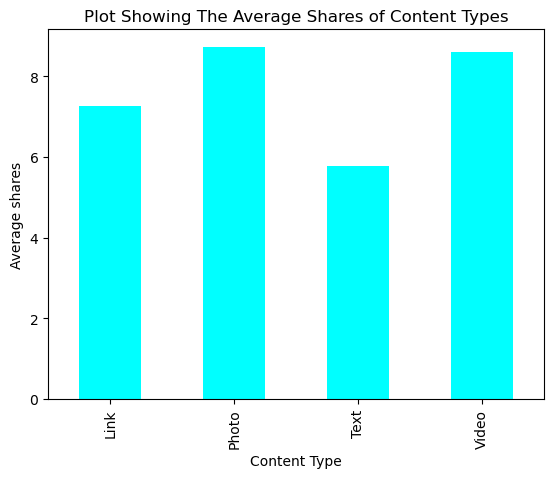

In [233]:
twitter.groupby('Content Type')['Shares'].mean().plot(kind = 'bar', color = 'cyan')
plt.title('Plot Showing The Average Shares of Content Types')
plt.xlabel('Content Type')
plt.ylabel('Average shares')
plt.savefig('content_types_shares.jpg');

The plot below shows the admins who sent the posts and it can also be seen that most of the posts were sent by people whose names were not mentioned

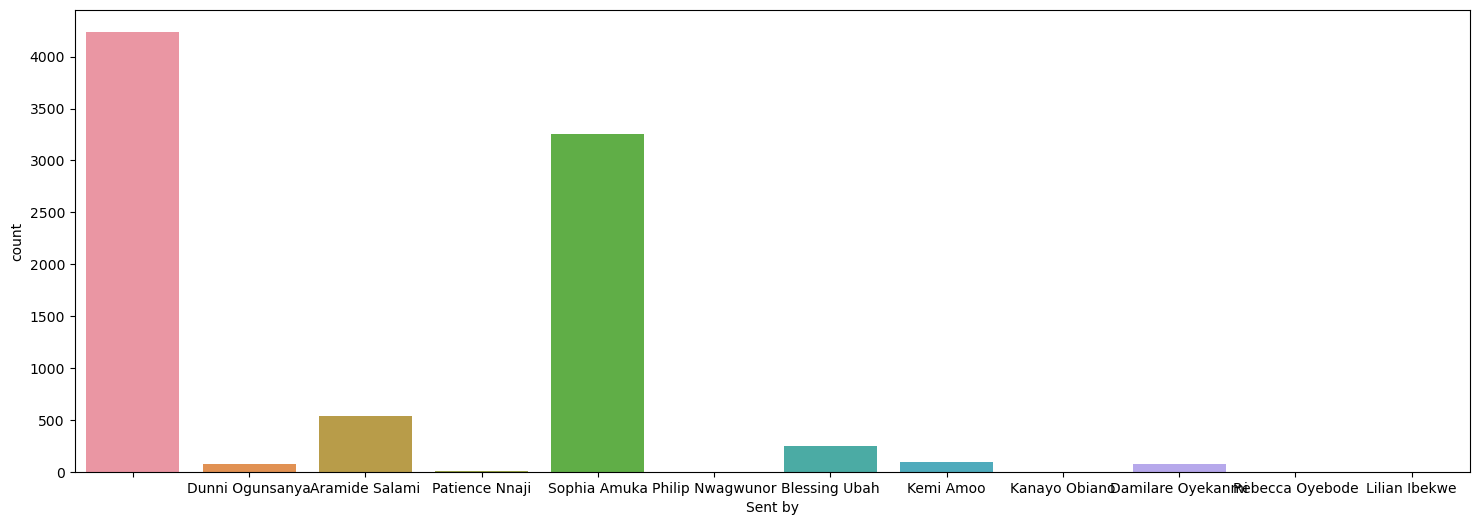

In [134]:
plt.figure(figsize=(18,6))
sns.countplot(x = 'Sent by', data = twitter);

In [135]:
# nltk.download('stopwords')

def clean_text(text):
    if isinstance(text, str):
        # Remove symbols and digits
        text = ''.join([char for char in text if char.isalpha() or char.isspace()])
        
        # Tokenize the text
        words = text.lower().split()
        
        # Remove stopwords
        stop_words = set(stopwords.words('english'))
        words = [word for word in words if word not in stop_words]
        
        return ' '.join(words)
    else:
        return ''  # Return an empty string for missing or non-string values

In [136]:
twitter_original['Tags'] = twitter_original['Tags'].apply(clean_text)
# Concatenate all cleaned text into a single string
all_cleaned_text = ' '.join(twitter_original['Tags'])

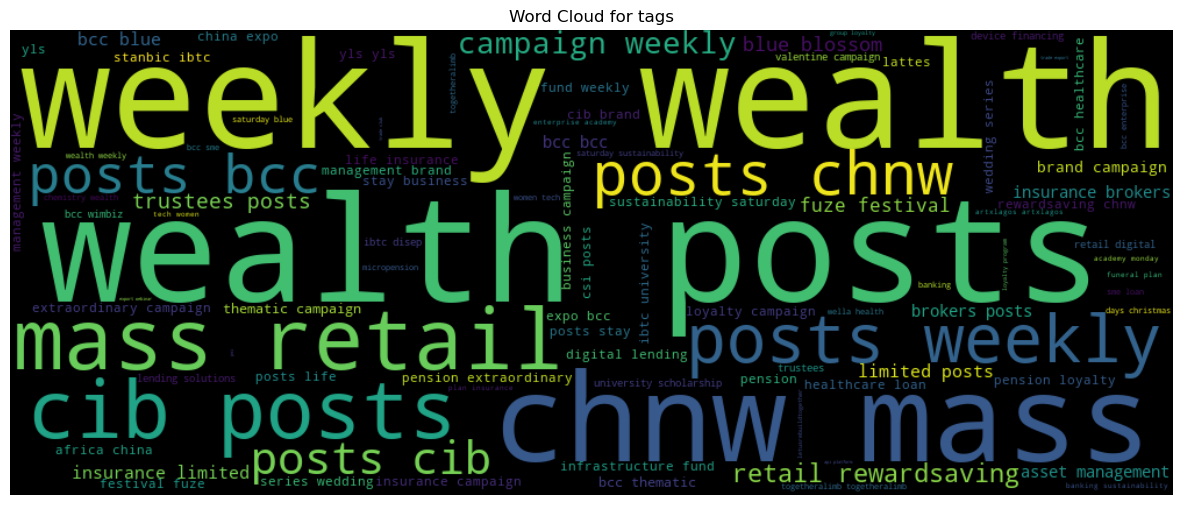

In [137]:
# Create a WordCloud object
wordcloud = WordCloud(width=1000, height=400, background_color='black').generate(all_cleaned_text)

# Display the WordCloud
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for tags')
plt.show()

Let's take a look at the correlation between the columns in the dataset. It is important to identify if there are interactions or no interactions at all. This is a multivariate analysis step

As seen in the figure below, some of the columns have high correlation while some do not. The scale at the right (0-1) helps to guide the visuals. The columns with which are entirely white need to be dropped, they signify zero variance, hence do not change through out the dataset.

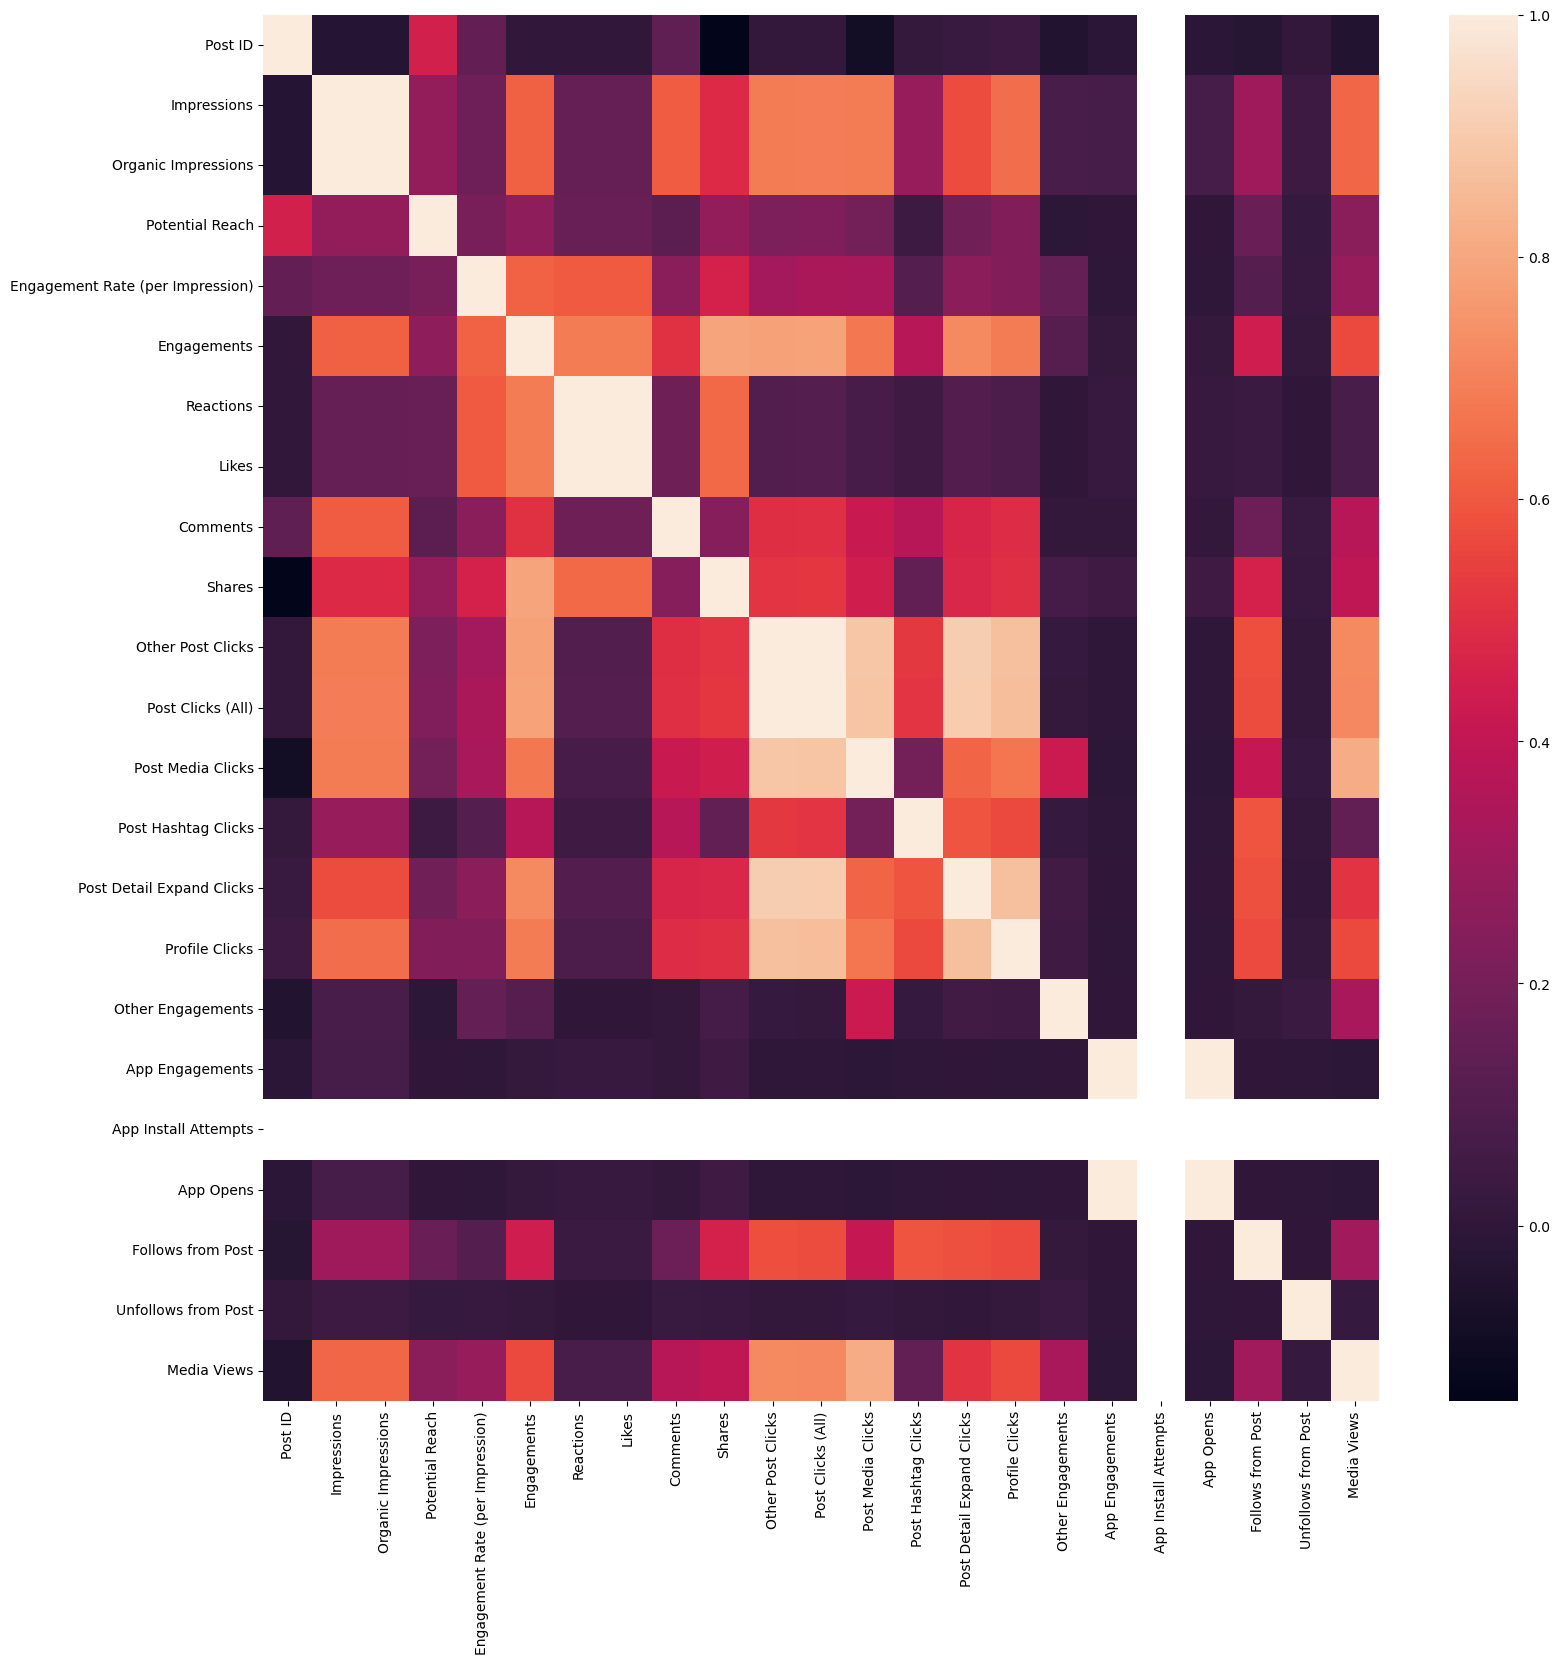

In [138]:
plt.figure(figsize=(18,18))
sns.heatmap(twitter.corr());

In [139]:
# Identify columns with zero variance
zero_variance_columns = twitter.select_dtypes('number').columns[twitter.var() == 0]

# Remove columns with zero variance
twitter = twitter.drop(columns=zero_variance_columns)

C:\Users\DELL\AppData\Local\Temp\ipykernel_13652\3131429580.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  zero_variance_columns = twitter.select_dtypes('number').columns[twitter.var() == 0]


    After dropping the columns with zero variance, the heatmap can be better visualized below.

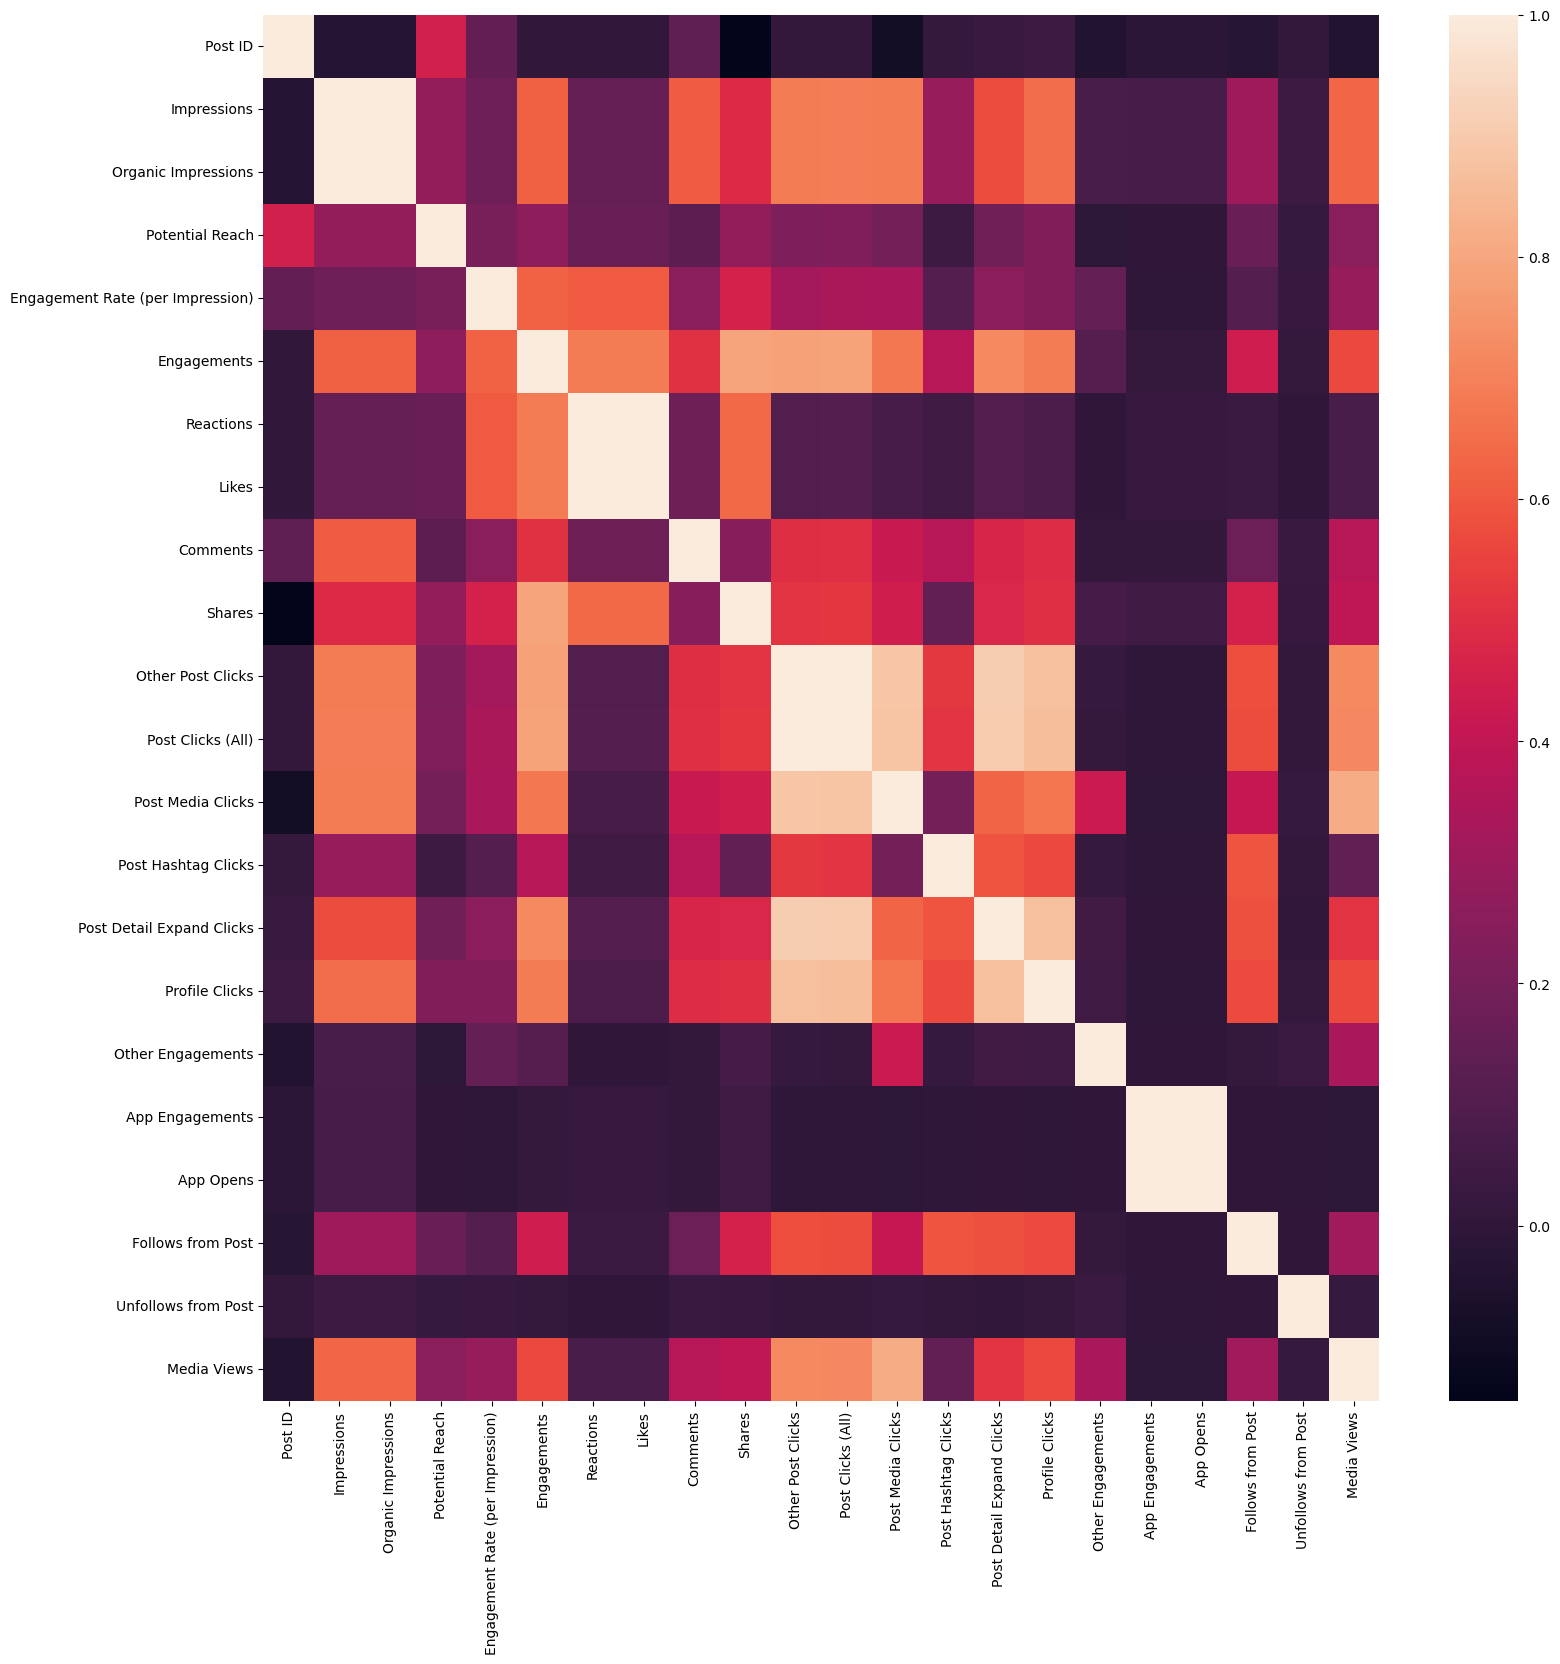

In [140]:
plt.figure(figsize=(18,18))
sns.heatmap(twitter.corr());

Let's analyze the describe method for the dataset

Many columns have abnormal distributions, the mean is greater than the median, hence creating right-skewed distributions. For a good data science project, it is also good to work with a normal distribution. Not to worry, when creating models, the Standardization method in sklearn will be used

In [141]:
twitter.describe()

,Post ID,Impressions,Organic Impressions,Potential Reach,Engagement Rate (per Impression),Engagements,Reactions,Likes,Comments,Shares,Other Post Clicks,Post Clicks (All),Post Media Clicks,Post Hashtag Clicks,Post Detail Expand Clicks,Profile Clicks,Other Engagements,App Engagements,App Opens,Follows from Post,Unfollows from Post,Media Views
count,8.529000e+03,7842.000000,7842.000000,8.449000e+03,7841.000000,7842.000000,7842.000000,7842.000000,7842.000000,7842.000000,7842.000000,7842.000000,6693.000000,5897.000000,7842.000000,7842.000000,7842.000000,7842.000000,7842.000000,7842.000000,7842.000000,6698.000000
mean,1.209537e+18,3188.676486,3188.676486,2.806459e+05,2.910116,110.073706,20.210150,20.210150,6.244963,8.317394,69.002168,72.228513,45.097116,1.534000,24.242158,5.116934,3.062357,0.000510,0.000510,0.028819,0.024356,63.247387
std,2.954973e+17,3337.303183,3337.303183,1.053295e+05,2.870294,305.482358,171.197047,171.197047,17.722314,21.606553,198.227784,201.478524,106.118962,14.064529,105.778891,13.704917,30.596482,0.027658,0.027658,0.371729,0.165338,138.636464
min,3.030516e+17,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.706765e+17,1285.000000,1285.000000,2.226310e+05,1.680000,29.000000,5.000000,5.000000,0.000000,2.000000,15.000000,16.000000,9.000000,0.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000
50%,1.232560e+18,2440.500000,2440.500000,3.030520e+05,2.390000,57.000000,10.000000,10.000000,2.000000,4.000000,31.000000,34.000000,20.000000,0.000000,9.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000
75%,1.497255e+18,3801.000000,3801.000000,3.210280e+05,3.400000,109.000000,17.000000,17.000000,6.000000,10.000000,67.000000,71.000000,44.000000,1.000000,21.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,66.000000
max,1.679430e+18,77765.000000,77765.000000,2.194275e+06,112.680000,14972.000000,13528.000000,13528.000000,623.000000,1135.000000,9083.000000,9124.000000,3698.000000,812.000000,4776.000000,609.000000,1201.000000,2.000000,2.000000,21.000000,3.000000,3769.000000


In [142]:
#deriving a visualiztion for the first 12 numeric columns in the dataset

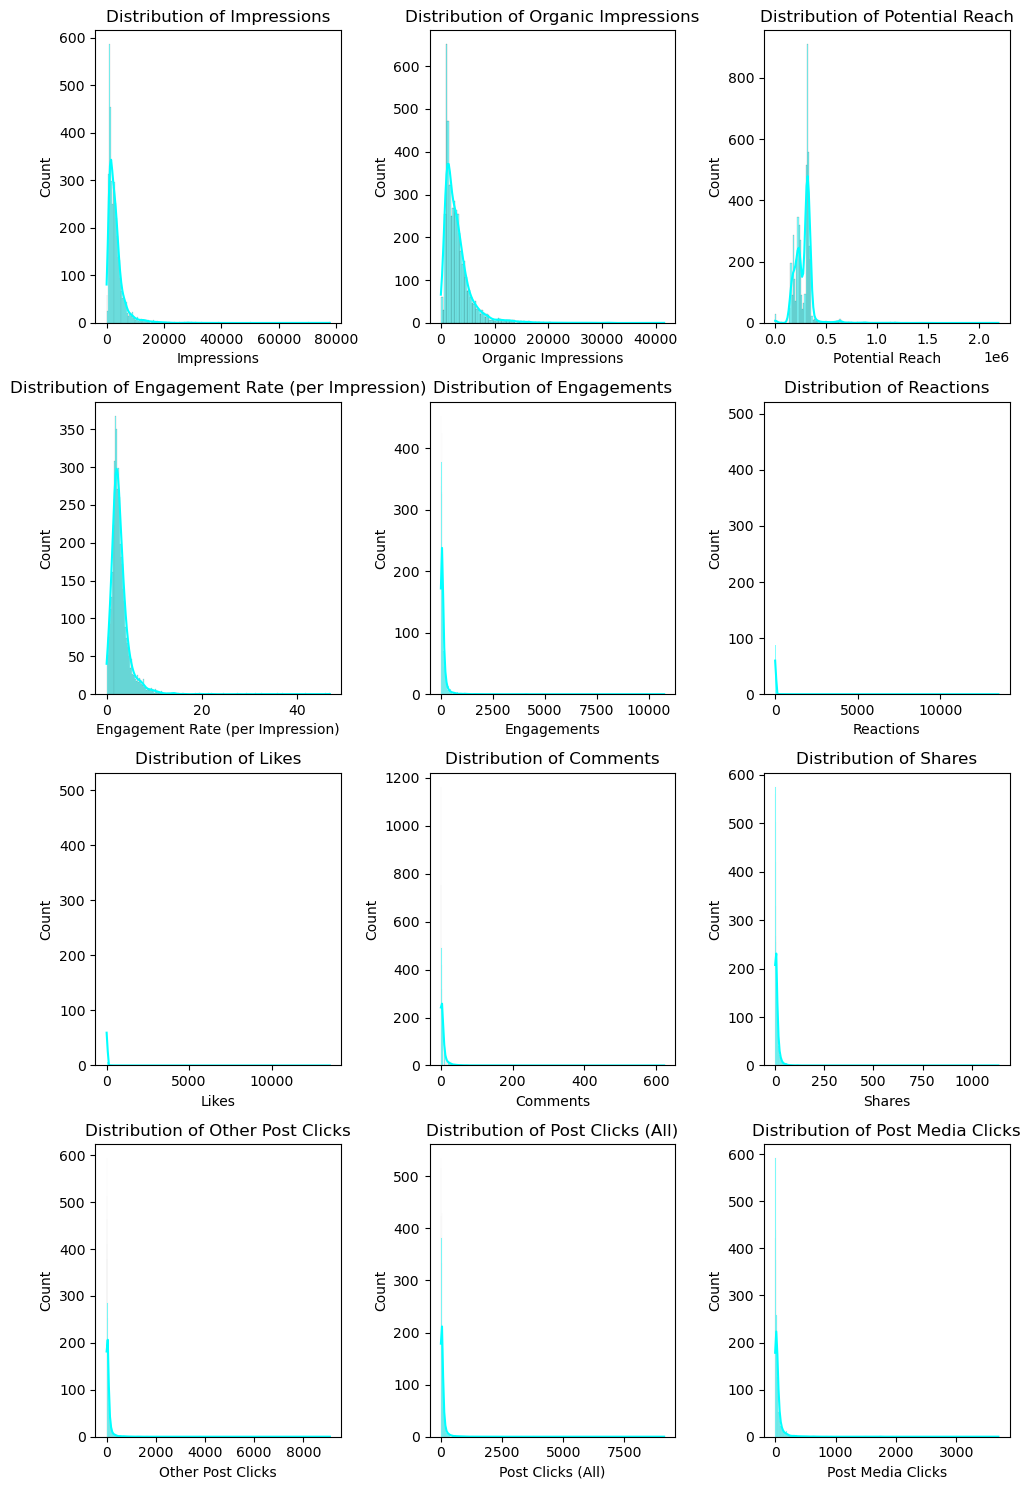

In [143]:
# Get a list of numeric columns in the dataset
numeric_columns = twitter.select_dtypes('number').columns.to_list()[1:13]

# Define the number of rows and columns for the subplot grid
n_rows = 4
n_cols = 3

# Create a figure and a grid of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 15),)

# Flatten the 2D array of subplots into a 1D array
axes = axes.flatten()

# Iterate through the numeric columns and plot distribution plots
for i, col in enumerate(numeric_columns):
    sns.histplot(twitter.sample(5000)[col], ax=axes[i], kde=True, color = 'cyan')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)

# Remove any empty subplots
for i in range(len(numeric_columns), n_rows * n_cols):
    fig.delaxes(axes[i])

# Adjust the layout
plt.tight_layout()
plt.show()


In [144]:
#checking for null values present in the data
twitter.isna().sum()

Date                                   0
Post ID                                0
Network                                0
Post Type                              0
Content Type                           0
Profile                                0
Sent by                                0
Link                                  48
Post                                   0
Linked Content                      3551
Impressions                          687
Organic Impressions                  687
Potential Reach                       80
Engagement Rate (per Impression)     688
Engagements                          687
Reactions                            687
Likes                                687
Comments                             687
Shares                               687
Other Post Clicks                    687
Post Clicks (All)                    687
Post Media Clicks                   1836
Post Hashtag Clicks                 2632
Post Detail Expand Clicks            687
Profile Clicks  

In [145]:
#recalculating the shape of the data
twitter.shape

(8529, 31)

It is almost of no use if a lot of columns are empty per row, hence i used the thresh option in dropna to define a threshold. Upon meeting this threshold, any number of null values above will be dropped completely from the data

In [146]:
twitter = twitter.dropna(thresh = 2)

Next, I used the groupby method in pandas to group by the content type and find the average or mean of all the numeric colums. The purpose of this is to compare each content type and the average expected

In [147]:
twitter.groupby('Content Type').mean()

,Post ID,Impressions,Organic Impressions,Potential Reach,Engagement Rate (per Impression),Engagements,Reactions,Likes,Comments,Shares,Other Post Clicks,Post Clicks (All),Post Media Clicks,Post Hashtag Clicks,Post Detail Expand Clicks,Profile Clicks,Other Engagements,App Engagements,App Opens,Follows from Post,Unfollows from Post,Media Views
Content Type,,,,,,,,,,,,,,,,,,,,,,
Link,9.253622e+17,1997.767908,1997.767908,236537.927861,2.197536,56.667622,7.836676,7.836676,1.833811,7.266476,29.687679,39.679083,51.746479,1.141026,15.057307,3.338109,0.042980,0.011461,0.011461,0.025788,0.020057,64.756757
Photo,1.247558e+18,3376.817414,3376.817414,285375.193039,2.983351,119.026552,21.605000,21.605000,6.668621,8.723448,78.578448,81.986379,46.520345,1.599867,25.465172,5.352759,0.033966,0.000000,0.000000,0.030517,0.021552,46.523448
Text,9.568955e+17,2609.051487,2609.051487,229914.648649,1.978822,73.204805,8.186499,8.186499,4.878719,5.784897,27.067506,27.109840,3.000000,2.048889,21.308924,4.693364,27.219680,0.000000,0.000000,0.030892,0.041190,2.200000
Video,1.366840e+18,2982.329670,2982.329670,322949.036405,3.689060,108.774115,28.435897,28.435897,6.582418,8.592186,62.688645,65.144078,34.595849,0.926081,22.625153,4.656899,0.015873,0.000000,0.000000,0.015873,0.028083,181.919414


As humans, the above table is just a bunch of weird numbers but a visualization can be plotted to understand it better and it is shown below

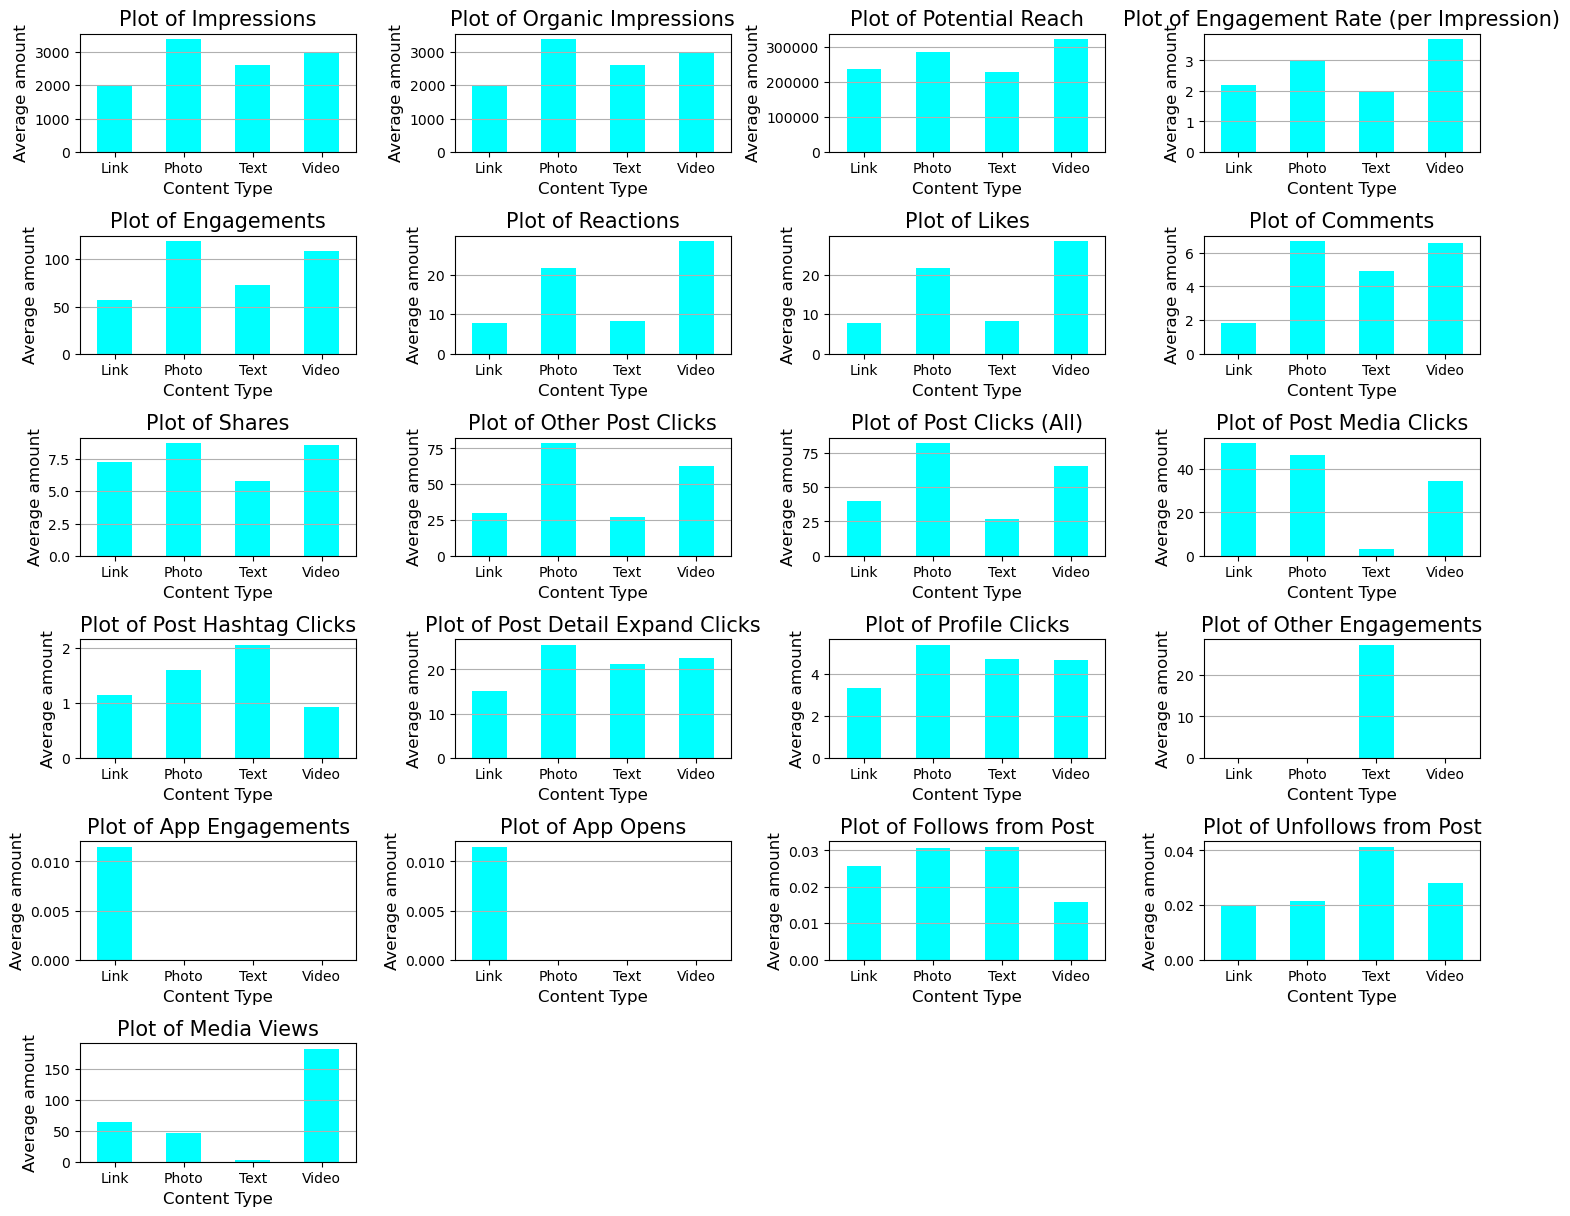

In [148]:
# Define the columns to plot (excluding 'Content Type')
columns_to_plot = twitter.groupby('Content Type').mean().columns.to_list()[1:]

# Define the number of rows and columns for the subplot grid
n_rows = 15
n_cols = 4  # You can adjust this to 5x5 or any other size as needed

# Create a figure and a grid of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 30))

# Flatten the 2D array of subplots into a 1D array
axes = axes.flatten()

# Iterate through the columns and plot each one
for i, col in enumerate(columns_to_plot):
    twitter.groupby('Content Type').mean()[col].plot(kind='bar', color='cyan', ax=axes[i])
    axes[i].set_title(f'Plot of {col}', fontsize = 15)
    axes[i].set_ylabel('Average amount', fontsize = 12)
    axes[i].set_xlabel('Content Type', fontsize = 12)
    axes[i].tick_params(axis='x', labelrotation=0)
    axes[i].grid(axis='y')

# Remove any empty subplots
for i in range(len(columns_to_plot), n_rows * n_cols):
    fig.delaxes(axes[i])

# Adjust the layout
plt.tight_layout()
plt.show()


The above plot juxtaposes all of the numeric columns, based on the content type and mean. For example, the first plot shows the Plot of impressions. It can be seen that text has the highest impressions across board, followed by photos, link and videos. It means when people see texts, they is likely to be more impression rate.

Let's take a look at some of the posts that were sent

In [149]:
twitter['Post'][-10:]

9    Let us work together to help you reach the rem...
8    With the Stanbic IBTC SME Online-Bento Redirec...
7    Hey CEOs, it’s time to say goodbye to complexi...
6    Together, we can make a difference and build a...
5    Tell us in the comments.\n#ITCANBE https://t.c...
4    Safeguard every aspect of your operations with...
3    Here are some mistakes you shouldn’t make duri...
2    Sade was able to acquire a home loan and make ...
1    What skill (s) do you have, that no one ever t...
0    Your money should not be a gamble. Before you ...
Name: Post, dtype: object

    Each post have varied length, I calculated the length of each post and plotted the histogram below. The lenght of most posts is usually between 10 to 300 words in a singular post

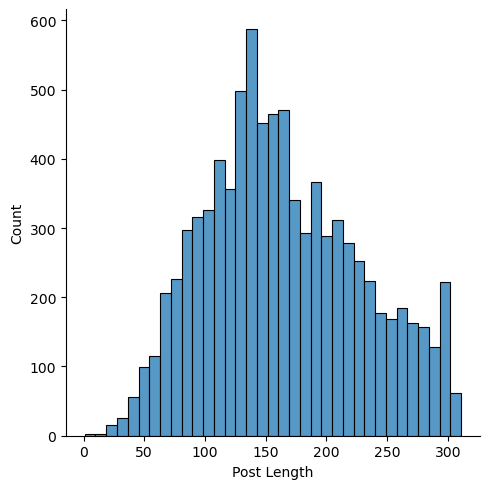

In [235]:
twitter['Post Length'] = twitter['Post'].str.len()
sns.displot(twitter['Post Length'])
plt.savefig('posts.jpg');

In [151]:
# nltk.download('stopwords')

def clean_text(text):
    if isinstance(text, str):
        # Remove symbols and digits
        text = ''.join([char for char in text if char.isalpha() or char.isspace()])
        
        # Tokenize the text
        words = text.lower().split()
        
        # Remove stopwords
        stop_words = set(stopwords.words('english'))
        words = [word for word in words if word not in stop_words]
        
        return ' '.join(words)
    else:
        return ''  # Return an empty string for missing or non-string values




In [152]:
twitter['Post'] = twitter['Post'].apply(clean_text)


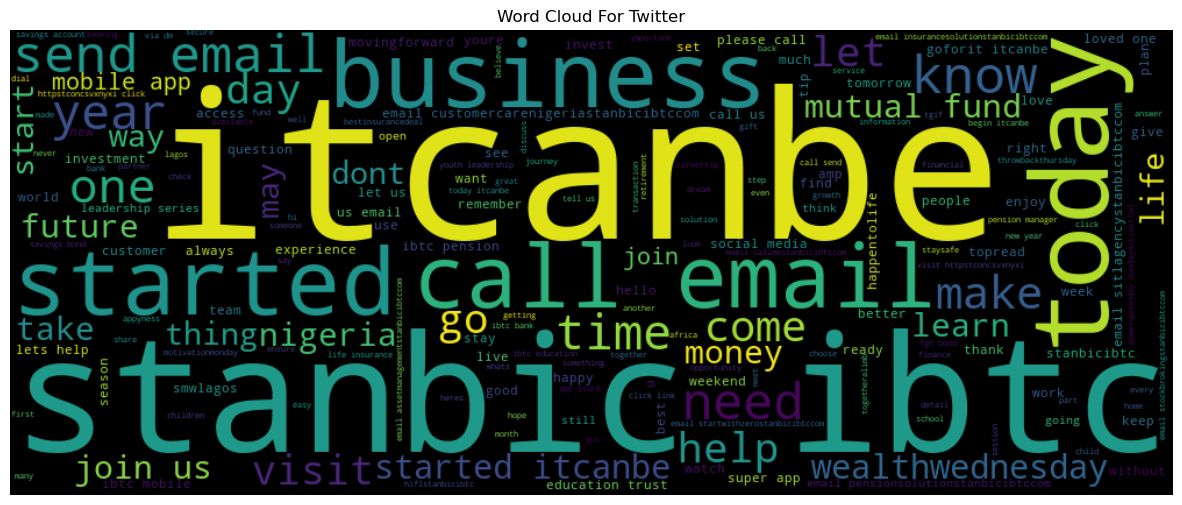

In [153]:
# Concatenate all cleaned text into a single string
all_cleaned_text = ' '.join(twitter['Post'])

# Create a WordCloud object
wordcloud = WordCloud(width=1000, height=400, background_color='black').generate(all_cleaned_text)

# Display the WordCloud
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud For Twitter')
plt.show()


It shows that stanbic ibtc, email, education, itcanbe,love, need, call, money, nigeria etc are often talked about in the posts

'Itcanbe' is present as much times as stanbic ibtc because 'itcanbe' is like a motto, which might also be referred to as hashtags in some social media websites

## Feature Engineering

In this section, I created date-related features and other features too

In [154]:
#deriving data related features

twitter['year'] = twitter['Date'].dt.year 
twitter['quarter'] = twitter['Date'].dt.quarter
twitter['month'] = twitter['Date'].dt.month
twitter['day'] = twitter['Date'].dt.day 
twitter['hour'] = twitter['Date'].dt.hour
twitter['minute'] = twitter['Date'].dt.minute
twitter['weekdays'] = twitter['Date'].dt.weekday

In [155]:
twitter.columns

Index(['Date', 'Post ID', 'Network', 'Post Type', 'Content Type', 'Profile',
       'Sent by', 'Link', 'Post', 'Linked Content', 'Impressions',
       'Organic Impressions', 'Potential Reach',
       'Engagement Rate (per Impression)', 'Engagements', 'Reactions', 'Likes',
       'Comments', 'Shares', 'Other Post Clicks', 'Post Clicks (All)',
       'Post Media Clicks', 'Post Hashtag Clicks', 'Post Detail Expand Clicks',
       'Profile Clicks', 'Other Engagements', 'App Engagements', 'App Opens',
       'Follows from Post', 'Unfollows from Post', 'Media Views',
       'Post Length', 'year', 'quarter', 'month', 'day', 'hour', 'minute',
       'weekdays'],
      dtype='object')

In [156]:
twitter.isna().sum()

Date                                   0
Post ID                                0
Network                                0
Post Type                              0
Content Type                           0
Profile                                0
Sent by                                0
Link                                  48
Post                                   0
Linked Content                      3551
Impressions                          687
Organic Impressions                  687
Potential Reach                       80
Engagement Rate (per Impression)     688
Engagements                          687
Reactions                            687
Likes                                687
Comments                             687
Shares                               687
Other Post Clicks                    687
Post Clicks (All)                    687
Post Media Clicks                   1836
Post Hashtag Clicks                 2632
Post Detail Expand Clicks            687
Profile Clicks  

In [157]:
# Calculate Engagement Ratio (Engagements per Impression)
twitter['Engagement Ratio'] = twitter['Engagements'] / twitter['Impressions']

twitter['Total clicks'] = twitter['Other Post Clicks'] + twitter['Post Clicks (All)'] + twitter['Post Media Clicks']                
+twitter['Post Hashtag Clicks']                
+twitter['Post Detail Expand Clicks']           
+twitter['Profile Clicks'] 


# Calculate Reactions Ratio (Reactions per Engagement)
twitter['Reactions Ratio'] = twitter['Reactions'] / twitter['Engagements']

# Calculate Comments Ratio (Comments per Engagement)
twitter['Comments Ratio'] = twitter['Comments'] / twitter['Engagements']

# Calculate Shares Ratio (Shares per Engagement)
twitter['Shares Ratio'] = twitter['Shares'] / twitter['Engagements']

# Calculate Average Engagement Rate (Average Engagement per Post)
average_engagement_rate = twitter['Engagements'].mean()
twitter['Average Engagement Rate'] = average_engagement_rate


# Calculate Impression Share
total_impressions = twitter['Impressions'].sum()
twitter['Organic Impression Share'] = twitter['Organic Impressions'] / total_impressions

# Calculate Post Length (assuming a 'Post Content' column)
twitter['Post Length'] = twitter['Post'].str.len()

#calculating fan actions
twitter['fans actions'] = twitter['Follows from Post'] + twitter['Follows from Post']


# Modelling [Machine Learning]

### Engagements Classification

The engagement can be predicted. In this section, i created a machine learning model, a classifier which classifies the engagements.

In [158]:
#replacing inf,np.nan values with zero
twitter = twitter.replace([np.inf,-np.inf],np.nan)
twitter.fillna(0,inplace= True)

In [159]:
twitter['Engagements'].describe()

count     8529.000000
mean       101.207410
std        294.447391
min          0.000000
25%         22.000000
50%         51.000000
75%        102.000000
max      14972.000000
Name: Engagements, dtype: float64

In [160]:
#binning the engagement column into three different classes
def binningEngagements(x):
    if x <= 50:
        return 0 #low engagement
    elif x > 50 and x <= 150:
        return 1 #medium engagement
    elif x > 150 :
        return 2 #high engagement
    else:
        return -1 #no engagement

In [161]:
twitter['Engagements_Class'] = twitter['Engagements'].apply(lambda x : binningEngagements(x))

In [162]:
twitter['Engagements_Class'].value_counts()

0    4247
1    3006
2    1276
Name: Engagements_Class, dtype: int64

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


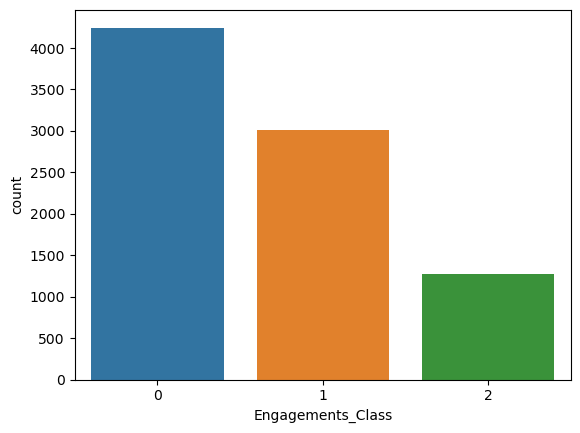

In [163]:
sns.countplot(twitter['Engagements_Class']);

The countplot above shows that there are less data points in class 0

In [164]:
df_engage = twitter.drop(columns = ['Date',	'Post ID',	'Network', 'Post Type','Profile',	'Sent by',
                               'Link', 'Post','Linked Content','Engagement Ratio','Engagements'])

In [165]:
le = LabelEncoder()

In [166]:
#encoding the content type column
df_engage['Content Type'] = le.fit_transform(df_engage['Content Type'])

In [167]:
df_engage.head(5)

,Content Type,Impressions,Organic Impressions,Potential Reach,Engagement Rate (per Impression),Reactions,Likes,Comments,Shares,Other Post Clicks,Post Clicks (All),Post Media Clicks,Post Hashtag Clicks,Post Detail Expand Clicks,Profile Clicks,Other Engagements,App Engagements,App Opens,Follows from Post,Unfollows from Post,Media Views,Post Length,year,quarter,month,day,hour,minute,weekdays,Total clicks,Reactions Ratio,Comments Ratio,Shares Ratio,Average Engagement Rate,Organic Impression Share,fans actions,Engagements_Class
8528,1,0.0,0.0,166372.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75,2013,1,2,17,9,1,6,0.0,0.0,0.0,0.0,110.073706,0.0,0.0,0
8527,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,107,2013,1,2,18,9,1,0,0.0,0.0,0.0,0.0,110.073706,0.0,0.0,0
8526,2,0.0,0.0,166372.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,92,2013,1,2,18,11,18,0,0.0,0.0,0.0,0.0,110.073706,0.0,0.0,0
8525,2,0.0,0.0,166372.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118,2013,1,2,18,19,13,0,0.0,0.0,0.0,0.0,110.073706,0.0,0.0,0
8524,2,0.0,0.0,166372.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117,2013,1,2,18,19,39,0,0.0,0.0,0.0,0.0,110.073706,0.0,0.0,0


In [168]:
X,y = df_engage.drop('Engagements_Class',axis = 1) , df_engage['Engagements_Class']

In [169]:
#splitting
xtrain,xtest,ytrain,ytest = train_test_split(X,y,random_state = 42, stratify = y)

In [170]:
lr = CatBoostClassifier(random_state = 42, iterations = 200)

In [171]:
#training
lr.fit(xtrain,ytrain)

Learning rate set to 0.338886
0:	learn: 0.6859306	total: 21.8ms	remaining: 4.34s
1:	learn: 0.4959404	total: 38.2ms	remaining: 3.79s
2:	learn: 0.3862280	total: 53.5ms	remaining: 3.51s
3:	learn: 0.2989004	total: 69.2ms	remaining: 3.39s
4:	learn: 0.2453179	total: 85.1ms	remaining: 3.32s
5:	learn: 0.2062080	total: 101ms	remaining: 3.27s
6:	learn: 0.1812936	total: 120ms	remaining: 3.3s
7:	learn: 0.1588896	total: 137ms	remaining: 3.3s
8:	learn: 0.1408854	total: 156ms	remaining: 3.31s
9:	learn: 0.1277694	total: 173ms	remaining: 3.29s
10:	learn: 0.1167987	total: 191ms	remaining: 3.28s
11:	learn: 0.1068295	total: 223ms	remaining: 3.49s
12:	learn: 0.0986700	total: 247ms	remaining: 3.56s
13:	learn: 0.0947675	total: 266ms	remaining: 3.53s
14:	learn: 0.0911740	total: 283ms	remaining: 3.49s
15:	learn: 0.0876725	total: 300ms	remaining: 3.44s
16:	learn: 0.0849781	total: 317ms	remaining: 3.41s
17:	learn: 0.0821293	total: 335ms	remaining: 3.38s
18:	learn: 0.0786903	total: 351ms	remaining: 3.34s
19:	lear

170:	learn: 0.0133531	total: 3.22s	remaining: 546ms
171:	learn: 0.0132624	total: 3.24s	remaining: 528ms
172:	learn: 0.0131998	total: 3.26s	remaining: 508ms
173:	learn: 0.0131435	total: 3.27s	remaining: 489ms
174:	learn: 0.0130731	total: 3.29s	remaining: 470ms
175:	learn: 0.0129796	total: 3.31s	remaining: 451ms
176:	learn: 0.0128535	total: 3.32s	remaining: 432ms
177:	learn: 0.0128006	total: 3.34s	remaining: 413ms
178:	learn: 0.0127141	total: 3.35s	remaining: 394ms
179:	learn: 0.0126052	total: 3.37s	remaining: 375ms
180:	learn: 0.0125498	total: 3.39s	remaining: 356ms
181:	learn: 0.0125340	total: 3.4s	remaining: 337ms
182:	learn: 0.0124325	total: 3.42s	remaining: 318ms
183:	learn: 0.0123805	total: 3.44s	remaining: 299ms
184:	learn: 0.0123383	total: 3.46s	remaining: 280ms
185:	learn: 0.0122854	total: 3.47s	remaining: 261ms
186:	learn: 0.0122103	total: 3.49s	remaining: 242ms
187:	learn: 0.0121021	total: 3.5s	remaining: 224ms
188:	learn: 0.0120523	total: 3.52s	remaining: 205ms
189:	learn: 0.

In [172]:
pred = lr.predict(xtest)

In [173]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1062
           1       0.99      0.98      0.98       752
           2       0.98      0.98      0.98       319

    accuracy                           0.99      2133
   macro avg       0.99      0.98      0.98      2133
weighted avg       0.99      0.99      0.99      2133



From the classfication report above, it can be seen that there is about 98% accuracy and a high score for f1-score too

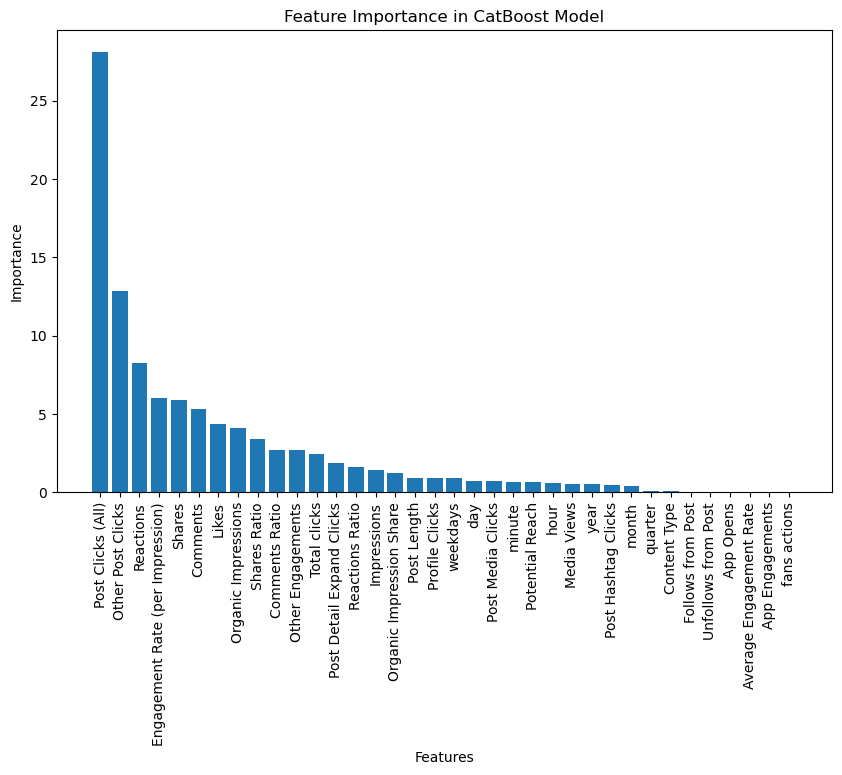

In [174]:
#feature importance
feature_importance = lr.get_feature_importance()
feature_names = X.columns

# Creating a DataFrame to store feature importance results
importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importance})

# Sorting the DataFrame by feature importance values
importance_df = importance_df.sort_values(by='importance', ascending=False)

# Plotting the feature importance
plt.figure(figsize=(10, 6))
plt.bar(importance_df['feature'], importance_df['importance'])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in CatBoost Model')
plt.show()

### Engagement Rate Regression Prediction

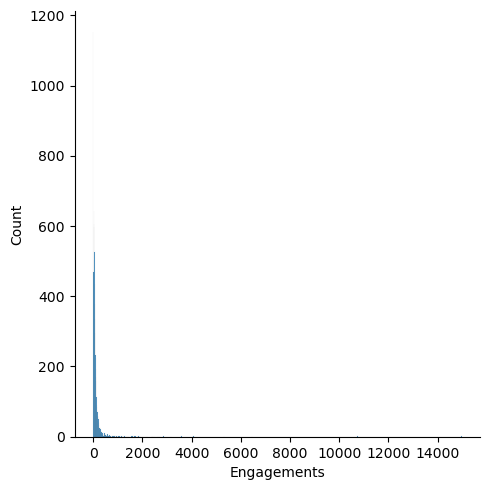

In [175]:
sns.displot(twitter['Engagements']);

The above shows that the data is greatly right-skewed and its not going to be very ideal for the machine learning model. It has to be corrected

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


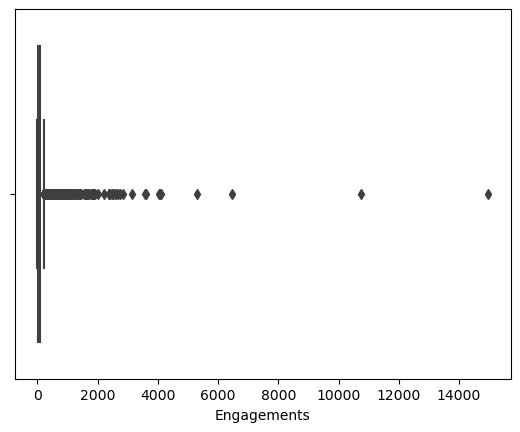

In [176]:
sns.boxplot(twitter['Engagements']);

In [177]:
#dropping engagements less than 5000
twitter = twitter[twitter['Engagements'] < 5000]

In [178]:
df_engage = twitter.drop(columns = ['Date',	'Post ID',	'Network', 'Post Type','Profile',	'Sent by', 'Link', 'Post','Linked Content','Engagement Ratio','Engagements_Class'])

In [179]:
le = LabelEncoder()

In [180]:
df_engage['Content Type'] = le.fit_transform(df_engage['Content Type'])

In [181]:
df_engage.head(5)

,Content Type,Impressions,Organic Impressions,Potential Reach,Engagement Rate (per Impression),Engagements,Reactions,Likes,Comments,Shares,Other Post Clicks,Post Clicks (All),Post Media Clicks,Post Hashtag Clicks,Post Detail Expand Clicks,Profile Clicks,Other Engagements,App Engagements,App Opens,Follows from Post,Unfollows from Post,Media Views,Post Length,year,quarter,month,day,hour,minute,weekdays,Total clicks,Reactions Ratio,Comments Ratio,Shares Ratio,Average Engagement Rate,Organic Impression Share,fans actions
8528,1,0.0,0.0,166372.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75,2013,1,2,17,9,1,6,0.0,0.0,0.0,0.0,110.073706,0.0,0.0
8527,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,107,2013,1,2,18,9,1,0,0.0,0.0,0.0,0.0,110.073706,0.0,0.0
8526,2,0.0,0.0,166372.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,92,2013,1,2,18,11,18,0,0.0,0.0,0.0,0.0,110.073706,0.0,0.0
8525,2,0.0,0.0,166372.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118,2013,1,2,18,19,13,0,0.0,0.0,0.0,0.0,110.073706,0.0,0.0
8524,2,0.0,0.0,166372.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117,2013,1,2,18,19,39,0,0.0,0.0,0.0,0.0,110.073706,0.0,0.0


In [182]:
X,y = df_engage.drop('Engagements',axis = 1) , df_engage['Engagements']

In [183]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,random_state = 42)

In [184]:
lr = CatBoostRegressor(random_state = 42, iterations = 200, verbose = False)

In [185]:
lr.fit(xtrain,ytrain)

In [186]:
pred = lr.predict(xtest)

In [187]:
mean_absolute_error(ytest,pred)

6.131849538935692

In [188]:
np.sqrt(mean_squared_error(ytest,pred))

55.7633285102979

from the mean absolute error and root means squared error, we can see that the scores are very fair.

For the modelling section,  a better model could be created upon speaking with the organizers of this competition to see their business needs. Knowing the business need can help to guide on creating a very robust model

In [189]:
os.makedirs('../cleaned_datasets', exist_ok = True)

In [190]:
twitter.to_csv('../cleaned_datasets/twitter_cleaned.csv',index = False)